# Learning rate 

learning rate 이 너무 크면 overshooting이 발생한다. -> 값이 작은 쪽으로 가지 않고 큰 값 쪽에서 왔다갔다한다. 

(이런 현상이 일어나면 learning rate 를 의심해봐야한다.)

learning rate 이 너무 작으면 학습이 끝났을 때도 제일 작은 값에 가지 않는다. ( 큰 것으로 한 번 바꿔본다. )

# Standarization

데이터가 치우칠 수 있으니 표준화를 시켜서 학습을 시킨다.

# Overfitting

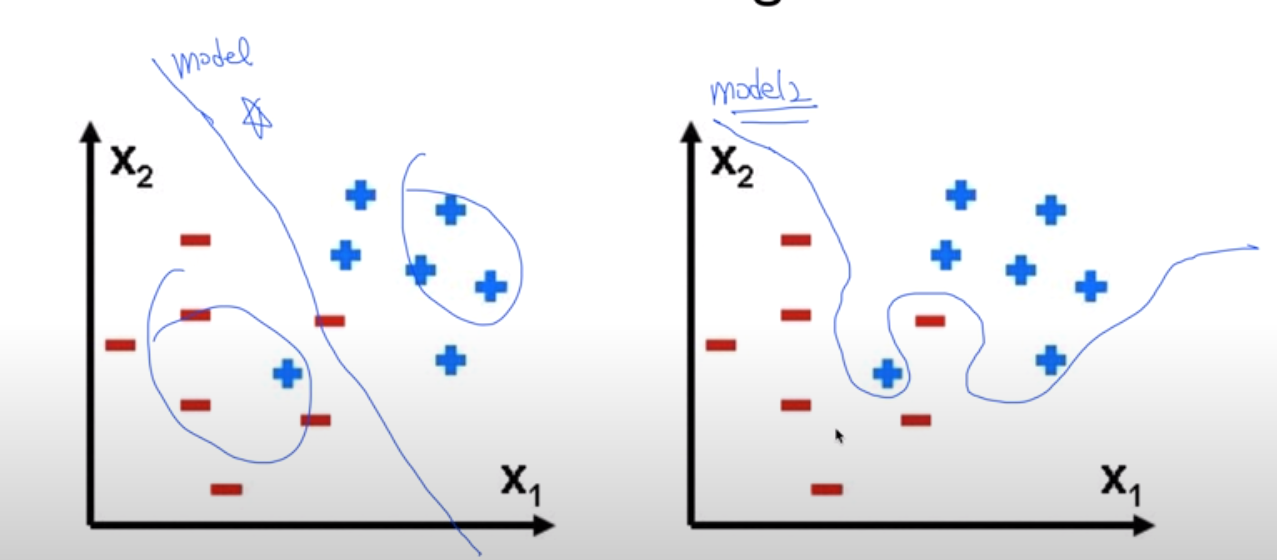

오른쪽과 같은 형태를 Overfitting 되어있다고한다. -> 굉장히 정확도가 떨어질 수 있다.

--> Training Data를 더 많이 사용하자

--> feature의 개수를 줄이자

--> Regularization ( weight를 너무 큰 값이 안 갖게 한다. ( 너무 구부리지 말자 )



# Training/Testing data set

data set을 학습시킨 후 테스트를 할때 똑같은 data set으로 테스트하면 효율 X

-> data set 을 Traing data 와 Testing data 로 분리하여 Traing data 를 훈련시키고 testing data 로 테스트하자

( Training data 를 교과서로 공부, Testing data 는 시험이라 생각하자 )

정확도는 이전과 같이 예측값과 실제값을 비교하면 된다.


In [1]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

# traing data 를 만들자

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Testing data 를 만들자
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


Instructions for updating:
non-resource variables are not supported in the long term
0 1.1558543 [[ 0.5807229   0.53629667  0.28503624]
 [-0.880366   -0.5175341  -0.27097937]
 [ 1.1865109   0.58328104 -0.3828085 ]]
1 1.0075483 [[ 0.5547206   0.5424017   0.30493358]
 [-0.9547444  -0.49127546 -0.22285959]
 [ 1.0872434   0.63115525 -0.3314152 ]]
2 0.92436826 [[ 0.5528882   0.5286323   0.3205353 ]
 [-0.90297264 -0.5720706  -0.19383623]
 [ 1.1160883   0.5679003  -0.2970051 ]]
3 0.8903267 [[ 0.53469634  0.53762937  0.3297301 ]
 [-0.9394094  -0.53282386 -0.19664629]
 [ 1.0536007   0.6222317  -0.28884894]]
4 0.87250215 [[ 0.5328474   0.52988255  0.33932585]
 [-0.89041984 -0.58170545 -0.19675417]
 [ 1.0803318   0.586407   -0.27975532]]
5 0.8590491 [[ 0.51894367  0.53647655  0.34663558]
 [-0.90588945 -0.55437213 -0.20861787]
 [ 1.0402896   0.6267607  -0.28006688]]
6 0.8482195 [[ 0.5151779   0.5313864   0.35549155]
 [-0.86864805 -0.5882026  -0.21202883]
 [ 1.0560089   0.6048409  -0.27386636]]
7 0

66 0.66692847 [[ 0.12806806  0.5049568   0.76903087]
 [-0.51982903 -0.65239924 -0.49665105]
 [ 0.8350508   0.70607054 -0.1541382 ]]
67 0.6655462 [[ 0.12283287  0.5044218   0.7748011 ]
 [-0.517496   -0.65179974 -0.4995836 ]
 [ 0.8346643   0.7059194  -0.15360051]]
68 0.6641824 [[ 0.11763274  0.50388116  0.78054184]
 [-0.51515627 -0.6512557  -0.50246733]
 [ 0.8343857   0.7056951  -0.15309764]]
69 0.6628363 [[ 0.11244634  0.50335765  0.7862517 ]
 [-0.5129249  -0.650646   -0.50530845]
 [ 0.8340971   0.70552105 -0.152635  ]]
70 0.6615076 [[ 0.10729221  0.50283086  0.79193264]
 [-0.5106948  -0.65008205 -0.5081025 ]
 [ 0.83390266  0.70528686 -0.15220638]]
71 0.66019577 [[ 0.10215282  0.50231946  0.7975834 ]
 [-0.50856024 -0.6494644  -0.51085466]
 [ 0.8337055   0.70509386 -0.1518162 ]]
72 0.6589003 [[ 0.09704334  0.50180674  0.8032056 ]
 [-0.5064331  -0.6488847  -0.5135615 ]
 [ 0.8335909   0.7048515  -0.15145926]]
73 0.6576207 [[ 0.09194933  0.5013079   0.80879843]
 [-0.50439066 -0.64826137 -0.

 [ 0.9271221   0.682062   -0.22220087]]
182 0.5672606 [[-0.37701663  0.4838797   1.2951927 ]
 [-0.41559216 -0.5981519  -0.6551353 ]
 [ 0.92834735  0.68190104 -0.22326514]]
183 0.56667477 [[-0.38078716  0.48398685  1.298856  ]
 [-0.4153444  -0.5978661  -0.65566885]
 [ 0.9295741   0.6817403  -0.2243311 ]]
184 0.5660915 [[-0.38455087  0.48409748  1.3025091 ]
 [-0.41510093 -0.59758234 -0.6561961 ]
 [ 0.9308021   0.6815798  -0.22539869]]
185 0.56551075 [[-0.3883078   0.48421153  1.306152  ]
 [-0.41486156 -0.59730065 -0.6567172 ]
 [ 0.9320315   0.68141955 -0.22646782]]
186 0.5649326 [[-0.39205804  0.484329    1.3097848 ]
 [-0.41462636 -0.5970209  -0.6572321 ]
 [ 0.9332621   0.6812596  -0.22753842]]
187 0.56435674 [[-0.39580157  0.48444977  1.3134075 ]
 [-0.4143951  -0.5967432  -0.65774107]
 [ 0.934494    0.6810997  -0.22861044]]
188 0.5637835 [[-0.3995385   0.48457393  1.3170203 ]
 [-0.4141679  -0.5964674  -0.6582441 ]
 [ 0.93572694  0.68094015 -0.22968379]]
189 0.56321275 [[-0.4032688   0.4

# Learing rate 이상하게 설정했을 때

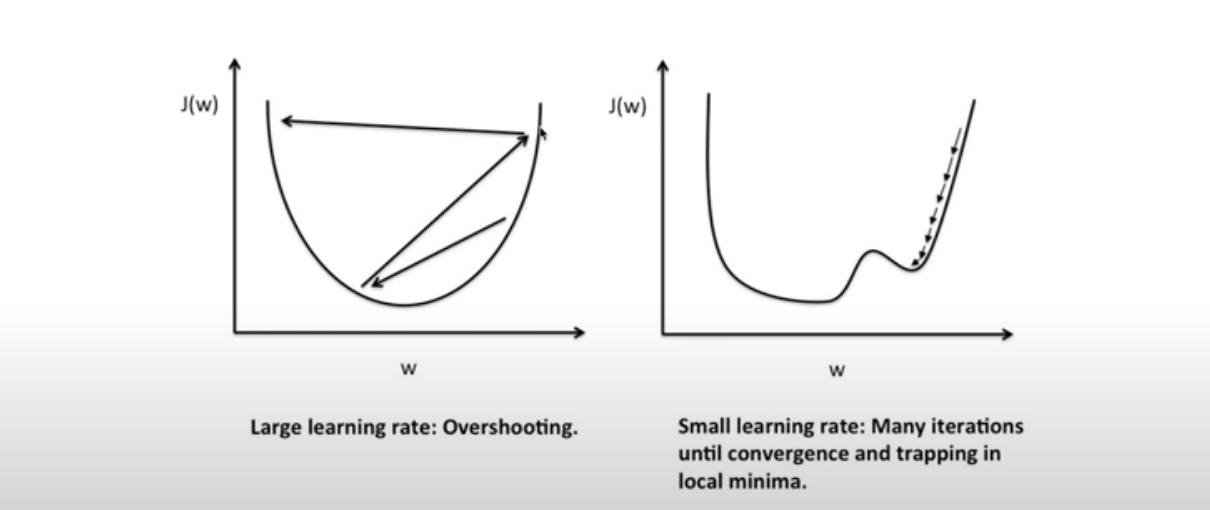

In [3]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

# traing data 를 만들자

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Testing data 를 만들자
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=100).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


0 10.527496 [[  23.733295   37.045277  -62.574123]
 [ 161.21614   174.00766  -334.34827 ]
 [ 162.40376   187.04445  -348.16934 ]]
1 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
2 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
3 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
4 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
5 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
10 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
11 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
12 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
13 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
14 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
15 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
16 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
17 nan [[nan nan nan]
 [nan nan

 [nan nan nan]]
181 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
182 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
183 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
184 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
185 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
186 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
187 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
188 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
189 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
190 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
191 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
192 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
193 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
194 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
195 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
196 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
197 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
198 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
199 nan [[na